<a href="https://colab.research.google.com/github/DCI-alxogm/ml2023-leo0nel09/blob/main/Ambientalesv_SP_uni.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Correlación Aire-COVID: Modelos de Regresión


En este estudio, exploré la relación entre la calidad del aire y el impacto del COVID-19 durante la primera ola de la pandemia. Utilicé modelos de regresión para analizar cómo los compuestos en el aire, como:
- PM2.5
- SO2
- CO
- NO2
- PM10
- O3
- HUMIDEX

se correlacionan con las tasas de confirmados y defunciones en diferentes municipios de un estado.

Los datos de este estudio fueron tomas del archivo
'COVID-19 (Emisiones LMP, Humidex y Beaufort).xlsx'

In [88]:
# Bibliotecas usadas
import pandas as pd
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [89]:
# Extraer datos
excel = '/content/drive/MyDrive/COVID-19 (Emisiones LMP, Humidex y Beaufort).xlsx'
xl = pd.ExcelFile(excel)
municipios = xl.sheet_names
municipios.remove('Resumen')

dataframes = []
for municipio in municipios:
    df = xl.parse(municipio, skiprows=2)
    df.columns = df.columns.str.strip().str.lower().str.replace('.', '')
    df.rename(columns={'humidex (valor obtenido a partir de la temperatura maxima y humedad relativa determina el confort debido a la temperatura aparente al combinar factores como humedad y temperatura': 'humidex'}, inplace=True)

    promedio_defunciones = df['total defunciones'].mean()
    promedio_confirmados = df['total confirmados'].mean()
    promedio_humidex = df['humidex'].mean()

    datos_municipio = {
        'municipio': municipio,
        'promedio defunciones': promedio_defunciones,
        'promedio confirmados': promedio_confirmados,
        'promedio humidex': promedio_humidex
    }

    dataframes.append(datos_municipio)

df_final = pd.DataFrame(dataframes)



In [90]:
df_final

,municipio,promedio defunciones,promedio confirmados,promedio humidex
0,Guanajuato,31.670732,388.695122,33.684398
1,Abasolo,6.164634,91.791411,36.560912
2,Acámbaro,19.969512,253.231707,35.377410
3,Apaseo el Alto,4.573171,64.713415,33.797447
4,Apaseo el grande,7.786585,110.152439,35.759971
5,Atarjea,0.000000,1.750000,36.573567
6,Celaya,108.908537,1126.932927,36.652243
7,Comonfort,4.323171,68.250000,35.617712
8,Cuerámaro,1.524390,71.871951,36.119446
9,Coroneo,0.000000,26.573171,34.257636


Estoy calculando la tasa de mortalidad diaria por COVID-19 ajustada por cada 10,000 habitantes en cada municipio del estado. Este cálculo nos proporciona una medida relativa del impacto de la enfermedad en diferentes áreas, teniendo en cuenta la densidad poblacional de cada lugar.

Los datos de la poblacion fueron obtenidos del archivo
'IDH_Guanajuato_v2'

In [91]:
# Definir la poblacion de cada municipio.
# Los datos de poblacion fueron sacados del archivo IDH_Guanajuato_v2
municipios_poblacion = {
    'Abasolo': 92040,
    'Acámbaro': 108697,
    'Apaseo el Alto': 63392,
    'Apaseo el Grande': 117883,
    'Atarjea': 5296,
    'Celaya': 521169,
    'Comonfort': 82216,
    'Coroneo': 11083,
    'Cortazar': 97928,
    'Cuerámaro': 30857,
    'Doctor Mora': 27390,
    'Dolores Hidalgo Cuna de la Independencia Nacional': 163038,
    'Guanajuato': 194500,
    'Huanímaro': 21128,
    'Irapuato': 592953,
    'Jaral del Progreso': 38782,
    'Jerécuaro': 49517,
    'León': 1721215,
    'Manuel Doblado': 41240,
    'Moroleón': 47261,
    'Ocampo': 26383,
    'Pénjamo': 154960,
    'Pueblo Nuevo': 12403,
    'Purísima del Rincón': 83842,
    'Romita': 65766,
    'Salamanca': 273417,
    'Salvatierra': 94126,
    'San Diego de la Unión': 41054,
    'San Felipe': 119793,
    'San Francisco del Rincón': 130871,
    'San José Iturbide': 89558,
    'San Luis de la Paz': 128536,
    'San Miguel de Allende': 174615,
    'Santa Catarina': 94126,
    'Santa Cruz de Juventino Rosas': 82340,
    'Santiago Maravatío': 6714,
    'Silao': 203556,
    'Tarandacuao': 11304,
    'Tarimoro': 35905,
    'Tierra Blanca': 20007,
    'Uriangato': 61494,
    'Valle de Santiago': 150054,
    'Victoria': 21253,
    'Villagrán': 65791,
    'Xichú': 11143,
    'Yuriria': 68741
}

# HUMIDEX
Se llevaron a cabo análisis de regresiones univariables para relacionar la tasa de confirmados y defunciones de cada estado con el índice HUMIDEX. Este mismo proceso se aplicó en diferentes contextos según el Índice de Desarrollo Humano (IDH).

Inicialmente, se realizó un análisis general que incluyó todos los municipios disponibles, con la excepción de Coronea y Atarjea debido a la falta de datos sobre defunciones. Posteriormente, se repitió el análisis considerando únicamente los municipios con un IDH alto y, por último, se hizo lo mismo para aquellos con un IDH medio.

Cada uno de estos modelos se representó gráficamente junto con su respectiva gráfica de dispersión.

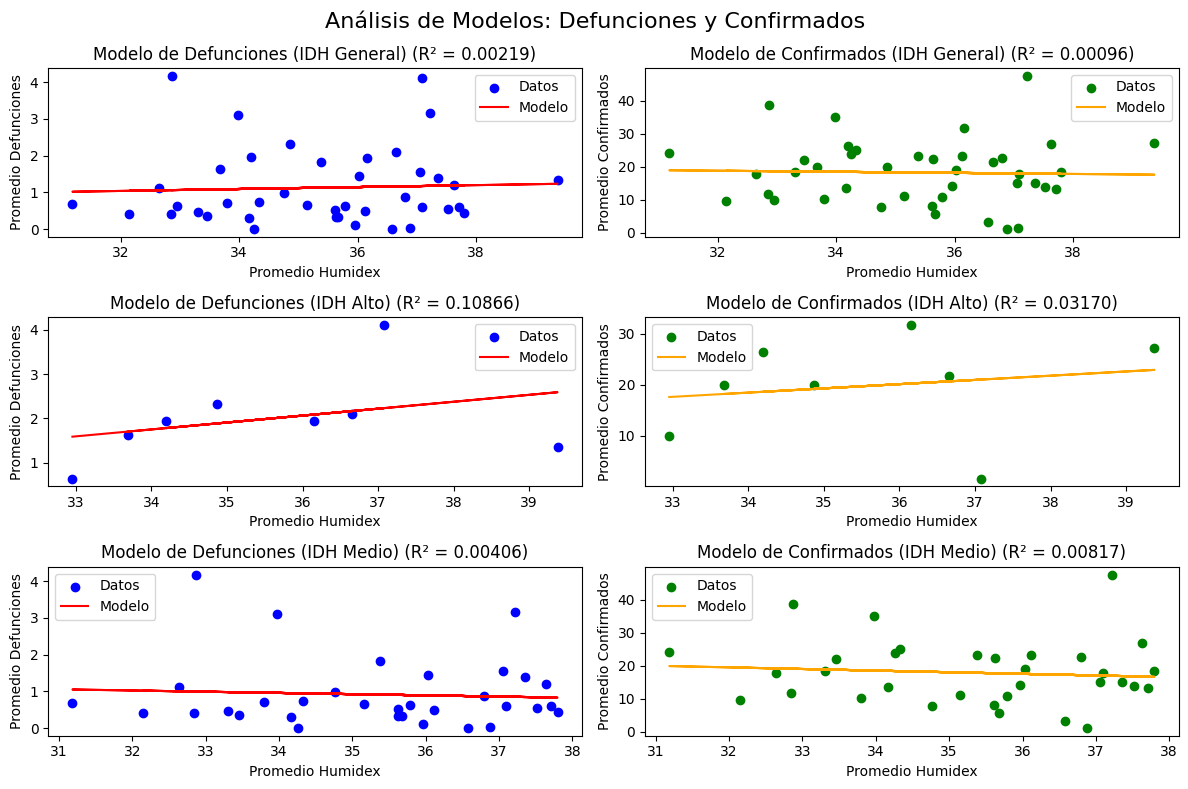

In [92]:
# Define los municipios de IDH ALTO
municipios_interes = ['Celaya', 'Cortazar', 'Guanajuato', 'Irapuato', 'León', 'Moroleón', 'Salamanca', 'San José Iturbide']
# Se definen los municipios de IDH medio
municipios_no_interes = [municipio for municipio in municipios_poblacion.keys() if municipio not in municipios_interes]

# Se calcula el promedio de defunciones y confirmados por 10000 habitantes
for municipio, poblacion in municipios_poblacion.items():
    df_final.loc[df_final['municipio'] == municipio, 'promedio_defunciones'] = (
        df_final['promedio defunciones'] / poblacion) * 10000
    df_final.loc[df_final['municipio'] == municipio, 'promedio_confirmados'] = (
        df_final['promedio confirmados'] / poblacion) * 10000

# Elimino las filas con valores NaN
df_final = df_final.dropna(subset=['promedio_defunciones', 'promedio_confirmados'])

#X_defunciones, Y_defunciones, X_confirmados, Y_confirmados IDH GENERAL, ALTO, MEDIO
X_defunciones_todos = df_final['promedio humidex'].values.reshape(-1, 1)
Y_defunciones_todos = df_final['promedio_defunciones'].values.reshape(-1, 1)
X_confirmados_todos = df_final['promedio humidex'].values.reshape(-1, 1)
Y_confirmados_todos = df_final['promedio_confirmados'].values.reshape(-1, 1)

X_defunciones_interes = df_final[df_final['municipio'].isin(municipios_interes)]['promedio humidex'].values.reshape(-1, 1)
Y_defunciones_interes = df_final[df_final['municipio'].isin(municipios_interes)]['promedio_defunciones'].values.reshape(-1, 1)
X_confirmados_interes = df_final[df_final['municipio'].isin(municipios_interes)]['promedio humidex'].values.reshape(-1, 1)
Y_confirmados_interes = df_final[df_final['municipio'].isin(municipios_interes)]['promedio_confirmados'].values.reshape(-1, 1)

X_defunciones_no_interes = df_final[df_final['municipio'].isin(municipios_no_interes)]['promedio humidex'].values.reshape(-1, 1)
Y_defunciones_no_interes = df_final[df_final['municipio'].isin(municipios_no_interes)]['promedio_defunciones'].values.reshape(-1, 1)
X_confirmados_no_interes = df_final[df_final['municipio'].isin(municipios_no_interes)]['promedio humidex'].values.reshape(-1, 1)
Y_confirmados_no_interes = df_final[df_final['municipio'].isin(municipios_no_interes)]['promedio_confirmados'].values.reshape(-1, 1)

# Creacion de modelos
modelo_hdefunciones_todos = linear_model.LinearRegression()
modelo_hconfirmados_todos = linear_model.LinearRegression()
modelo_hdefunciones_interes = linear_model.LinearRegression()
modelo_hconfirmados_interes = linear_model.LinearRegression()
modelo_hdefunciones_no_interes = linear_model.LinearRegression()
modelo_hconfirmados_no_interes = linear_model.LinearRegression()

modelo_hdefunciones_todos.fit(X_defunciones_todos, Y_defunciones_todos)
modelo_hconfirmados_todos.fit(X_confirmados_todos, Y_confirmados_todos)
modelo_hdefunciones_interes.fit(X_defunciones_interes, Y_defunciones_interes)
modelo_hconfirmados_interes.fit(X_confirmados_interes, Y_confirmados_interes)
modelo_hdefunciones_no_interes.fit(X_defunciones_no_interes, Y_defunciones_no_interes)
modelo_hconfirmados_no_interes.fit(X_confirmados_no_interes, Y_confirmados_no_interes)

# Realizar las predicciones
#IDH GENERAL
predicciones_defunciones_todos = modelo_hdefunciones_todos.predict(X_defunciones_todos)
predicciones_confirmados_todos = modelo_hconfirmados_todos.predict(X_confirmados_todos)
#IDH ALTO
predicciones_defunciones_interes = modelo_hdefunciones_interes.predict(X_defunciones_interes)
predicciones_confirmados_interes = modelo_hconfirmados_interes.predict(X_confirmados_interes)
#IDH MEDIO
predicciones_defunciones_no_interes = modelo_hdefunciones_no_interes.predict(X_defunciones_no_interes)
predicciones_confirmados_no_interes = modelo_hconfirmados_no_interes.predict(X_confirmados_no_interes)

# Calcula las métricas de evaluación
r2_defunciones_todos = r2_score(Y_defunciones_todos, predicciones_defunciones_todos)
r2_confirmados_todos = r2_score(Y_confirmados_todos, predicciones_confirmados_todos)
r2_defunciones_interes = r2_score(Y_defunciones_interes, predicciones_defunciones_interes)
r2_confirmados_interes = r2_score(Y_confirmados_interes, predicciones_confirmados_interes)
r2_defunciones_no_interes = r2_score(Y_defunciones_no_interes, predicciones_defunciones_no_interes)
r2_confirmados_no_interes = r2_score(Y_confirmados_no_interes, predicciones_confirmados_no_interes)

# Grafica los resultados
fig, axs = plt.subplots(3, 2, figsize=(12, 8))
fig.suptitle('Análisis de Modelos: Defunciones y Confirmados', fontsize=16)

# Graficas para todos los municipios
axs[0, 0].scatter(X_defunciones_todos, Y_defunciones_todos, color='blue', label='Datos')
axs[0, 0].plot(X_defunciones_todos, predicciones_defunciones_todos, color='red', label='Modelo')
axs[0, 0].set_title(f'Modelo de Defunciones (IDH General) (R² = {r2_defunciones_todos:.5f})')
axs[0, 0].set_xlabel('Promedio Humidex')
axs[0, 0].set_ylabel('Promedio Defunciones')
axs[0, 0].legend()

axs[0, 1].scatter(X_confirmados_todos, Y_confirmados_todos, color='green', label='Datos')
axs[0, 1].plot(X_confirmados_todos, predicciones_confirmados_todos, color='orange', label='Modelo')
axs[0, 1].set_title(f'Modelo de Confirmados (IDH General) (R² = {r2_confirmados_todos:.5f})')
axs[0, 1].set_xlabel('Promedio Humidex')
axs[0, 1].set_ylabel('Promedio Confirmados')
axs[0, 1].legend()

# Graficas solo para municipios de interés
axs[1, 0].scatter(X_defunciones_interes, Y_defunciones_interes, color='blue', label='Datos')
axs[1, 0].plot(X_defunciones_interes, predicciones_defunciones_interes, color='red', label='Modelo')
axs[1, 0].set_title(f'Modelo de Defunciones (IDH Alto) (R² = {r2_defunciones_interes:.5f})')
axs[1, 0].set_xlabel('Promedio Humidex')
axs[1, 0].set_ylabel('Promedio Defunciones')
axs[1, 0].legend()

axs[1, 1].scatter(X_confirmados_interes, Y_confirmados_interes, color='green', label='Datos')
axs[1, 1].plot(X_confirmados_interes, predicciones_confirmados_interes, color='orange', label='Modelo')
axs[1, 1].set_title(f'Modelo de Confirmados (IDH Alto) (R² = {r2_confirmados_interes:.5f})')
axs[1, 1].set_xlabel('Promedio Humidex')
axs[1, 1].set_ylabel('Promedio Confirmados')
axs[1, 1].legend()

# Graficas para municipios que no son de interés
axs[2, 0].scatter(X_defunciones_no_interes, Y_defunciones_no_interes, color='blue', label='Datos')
axs[2, 0].plot(X_defunciones_no_interes, predicciones_defunciones_no_interes, color='red', label='Modelo')
axs[2, 0].set_title(f'Modelo de Defunciones (IDH Medio) (R² = {r2_defunciones_no_interes:.5f})')
axs[2, 0].set_xlabel('Promedio Humidex')
axs[2, 0].set_ylabel('Promedio Defunciones')
axs[2, 0].legend()

axs[2, 1].scatter(X_confirmados_no_interes, Y_confirmados_no_interes, color='green', label='Datos')
axs[2, 1].plot(X_confirmados_no_interes, predicciones_confirmados_no_interes, color='orange', label='Modelo')
axs[2, 1].set_title(f'Modelo de Confirmados (IDH Medio) (R² = {r2_confirmados_no_interes:.5f})')
axs[2, 1].set_xlabel('Promedio Humidex')
axs[2, 1].set_ylabel('Promedio Confirmados')
axs[2, 1].legend()

plt.tight_layout()
plt.show()





En el análisis de correlación con el índice HUMIDEX, se encontró que no hubo una correlación satisfactoria entre este índice y las tasas de confirmados o defunciones del COVID-19 en los municipios estudiados. Esto se determinó mediante la evaluación de los valores del coeficiente de determinación (R cuadrada) obtenidos de los modelos de regresión univariable.

# Compuestos


Se repitió el mismo análisis de regresiones univariables, pero esta vez se llevó a cabo para cada uno de los compuestos en el aire en lugar del índice HUMIDEX. Para cada compuesto (PM2.5, SO2, CO, NO2, PM10 y O3), se evaluó su correlación con las tasas de confirmados y defunciones por COVID-19 en los municipios.

In [93]:
# Definiros nombres de las columnas de los compuestos
compuestos = ['imeca (pm2.5)', 'imeca so2', 'imeca co', 'imeca no2', 'imeca (pm 10)', 'imeca o3', 'total defunciones', 'total confirmados']

# crear data frame comforme se encuentren compuestos
df_promedios = pd.DataFrame(columns=['municipio'] + compuestos)

# Iterar sobre cada hoja de Excel (iterar sobre cada municipio)
for municipio in municipios:
    # Analizar la hoja correspondiente al municipio actual
    df = xl.parse(municipio, skiprows=2)
    df.columns = df.columns.str.strip().str.lower()

    # Columna nueva
    promedios = {'municipio': municipio}

    # Iterar sobre todos los compuestos
    for compuesto in compuestos:
        #  Esto filtra las columnas para incluir solo aquellas en las que la variable
        #  compuesto está contenida en el nombre de la columna (col).
        columnas_coincidentes = [col for col in df.columns if compuesto in col]

        # Eliminan NaN
        columnas_numericas = df[columnas_coincidentes].apply(pd.to_numeric, errors='coerce')

        # Calcular el promedio
        promedios[compuesto] = columnas_numericas.mean().mean()

    df_promedios = pd.concat([df_promedios, pd.DataFrame([promedios])], ignore_index=True)

municipios_poblacion = {
    'Silao': 203556,
    'San Miguel de Allende': 174615,
    'San Luis de la Paz': 128536,
    'Salamanca': 273417,
    'Purísima del Rincón': 83842,
    'León': 1721215,
    'Irapuato': 592953,
    'Celaya': 521169,
    'Abasolo': 92040,
    'Guanajuato': 194500
}

# Calcular la tasa de defunciones y confirmados por 10000 habitantes
for municipio, poblacion in municipios_poblacion.items():
    df_promedios.loc[df_promedios['municipio'] == municipio, 'tasa_defunciones'] = (
        df_promedios['total defunciones'] / poblacion) * 10000
    df_promedios.loc[df_promedios['municipio'] == municipio, 'tasa_confirmados'] = (
        df_promedios['total confirmados'] / poblacion) * 10000
#borrar NaN
df_promedios = df_promedios.dropna(subset=['tasa_confirmados'])


In [94]:
#Crear un data frame para cada compuesto que contega solo los datos del compuesto, las tasas de confirmados y defunciones.
# imeca (pm2.5)
df_pm25 = df_promedios[['municipio', 'imeca (pm2.5)', 'tasa_defunciones', 'tasa_confirmados']].dropna(subset=['imeca (pm2.5)'])
# imeca so2
df_so2 = df_promedios[['municipio', 'imeca so2', 'tasa_defunciones', 'tasa_confirmados']].dropna(subset=['imeca so2'])
# imeca co
df_co = df_promedios[['municipio', 'imeca co', 'tasa_defunciones', 'tasa_confirmados']].dropna(subset=['imeca co'])
# imeca no2
df_no2 = df_promedios[['municipio', 'imeca no2', 'tasa_defunciones', 'tasa_confirmados']].dropna(subset=['imeca no2'])
# imeca (pm 10)
df_pm10 = df_promedios[['municipio', 'imeca (pm 10)', 'tasa_defunciones', 'tasa_confirmados']].dropna(subset=['imeca (pm 10)'])
# imeca o3
df_o3 = df_promedios[['municipio', 'imeca o3', 'tasa_defunciones', 'tasa_confirmados']].dropna(subset=['imeca o3'])


In [95]:
dataframes = [df_pm25, df_so2, df_co, df_no2, df_pm10, df_o3]
# Asociar indices con los data frames
columnas = {
    0: 'imeca (pm2.5)',
    1: 'imeca so2',
    2: 'imeca co',
    3: 'imeca no2',
    4: 'imeca (pm 10)',
    5: 'imeca o3'
}

#Normalizar a 1
scaler = MinMaxScaler()

#Funcion que manda los datos de las columna y los data frames
def crear_modelo(dataframe, columna, target, ax):
  #valores X Y para los modelos
    X = dataframe[[columna]].values
    y = dataframe[[target]].values

    # Normalizar a 1
    X = scaler.fit_transform(X)
    y = scaler.fit_transform(y)

    modelo = LinearRegression()
    modelo.fit(X, y)
    y_pred = modelo.predict(X)

    r2 = r2_score(y, y_pred)

    ax.scatter(X, y, color='blue')
    ax.plot(X, y_pred, color='red')
    ax.set_xlabel(columna, fontsize=8)
    ax.set_ylabel(target, fontsize=8)
    ax.set_title(f' {target} vs {columna} (R^2 = {r2:.2f})', fontsize=8)

    return modelo, r2



A continuación, se presentan las gráficas que muestran la relación entre la tasa de confirmados y defunciones respecto al promedio de los compuestos en el aire. Es importante destacar que los datos de algunos compuestos están disponibles para algunos de los siguientes municipios:

- Silao
- San Miguel de Allende
- San Luis de la Paz
- Salamanca
- Purísima del Rincón
- León
- Irapuato
- Celaya
- Abasolo
- Guanajuato

En estas gráficas, se muestra el modelo para cada compuesto sin tomar en cuenta el Índice de Desarrollo Humano (IDH).

 imeca (pm2.5), Columna: imeca (pm2.5), Target: tasa_defunciones, R^2: 0.49\n
 imeca (pm2.5), Columna: imeca (pm2.5), Target: tasa_confirmados, R^2: 0.30\n
 imeca so2, Columna: imeca so2, Target: tasa_defunciones, R^2: 0.06\n
 imeca so2, Columna: imeca so2, Target: tasa_confirmados, R^2: 0.70\n
 imeca co, Columna: imeca co, Target: tasa_defunciones, R^2: 0.10\n
 imeca co, Columna: imeca co, Target: tasa_confirmados, R^2: 0.14\n
 imeca no2, Columna: imeca no2, Target: tasa_defunciones, R^2: 0.12\n
 imeca no2, Columna: imeca no2, Target: tasa_confirmados, R^2: 0.63\n
 imeca (pm 10), Columna: imeca (pm 10), Target: tasa_defunciones, R^2: 0.03\n
 imeca (pm 10), Columna: imeca (pm 10), Target: tasa_confirmados, R^2: 0.09\n
 imeca o3, Columna: imeca o3, Target: tasa_defunciones, R^2: 0.01\n
 imeca o3, Columna: imeca o3, Target: tasa_confirmados, R^2: 0.15\n


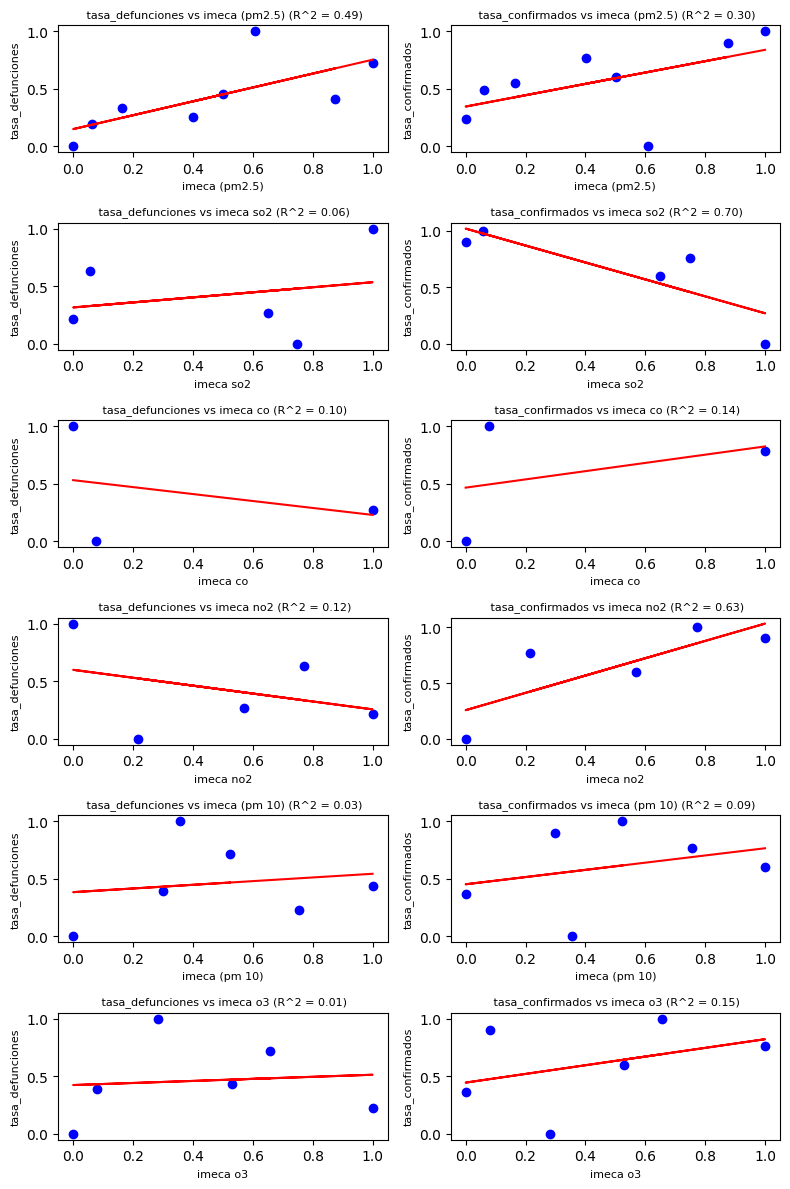

In [96]:
# Grafica
fig, axs = plt.subplots(len(dataframes), 2, figsize=(8, 12))

# Llamar a la funcion para crear el modelo para cada unos de los df mediante el ciclo for
for i, df in enumerate(dataframes):
    columna = columnas[i]
    for j, target in enumerate(['tasa_defunciones', 'tasa_confirmados']):
        modelo, r2 = crear_modelo(df, columna, target, axs[i, j])
        print(f' {df.columns[1]}, Columna: {columna}, Target: {target}, R^2: {r2:.2f}\\n')

plt.tight_layout()
plt.show()


Tras realizar el análisis, no se encontró ninguna correlación significativa entre los compuestos atmosféricos y el Índice de Desarrollo Humano (IDH) en general.



# IDH ALTO
A continuación, se realizará el mismo análisis, pero esta vez exclusivamente para los municipios con un Índice de Desarrollo Humano (IDH) alto.

 imeca (pm2.5), Columna: imeca (pm2.5), Target: tasa_defunciones, R^2: 0.11\n
 imeca (pm2.5), Columna: imeca (pm2.5), Target: tasa_confirmados, R^2: 0.02\n
 imeca so2, Columna: imeca so2, Target: tasa_defunciones, R^2: 0.26\n
 imeca so2, Columna: imeca so2, Target: tasa_confirmados, R^2: 0.61\n
 imeca co, Columna: imeca co, Target: tasa_defunciones, R^2: 0.10\n
 imeca co, Columna: imeca co, Target: tasa_confirmados, R^2: 0.14\n
 imeca no2, Columna: imeca no2, Target: tasa_defunciones, R^2: 0.27\n
 imeca no2, Columna: imeca no2, Target: tasa_confirmados, R^2: 0.58\n
 imeca (pm 10), Columna: imeca (pm 10), Target: tasa_defunciones, R^2: 0.22\n
 imeca (pm 10), Columna: imeca (pm 10), Target: tasa_confirmados, R^2: 0.04\n
 imeca o3, Columna: imeca o3, Target: tasa_defunciones, R^2: 0.25\n
 imeca o3, Columna: imeca o3, Target: tasa_confirmados, R^2: 0.03\n


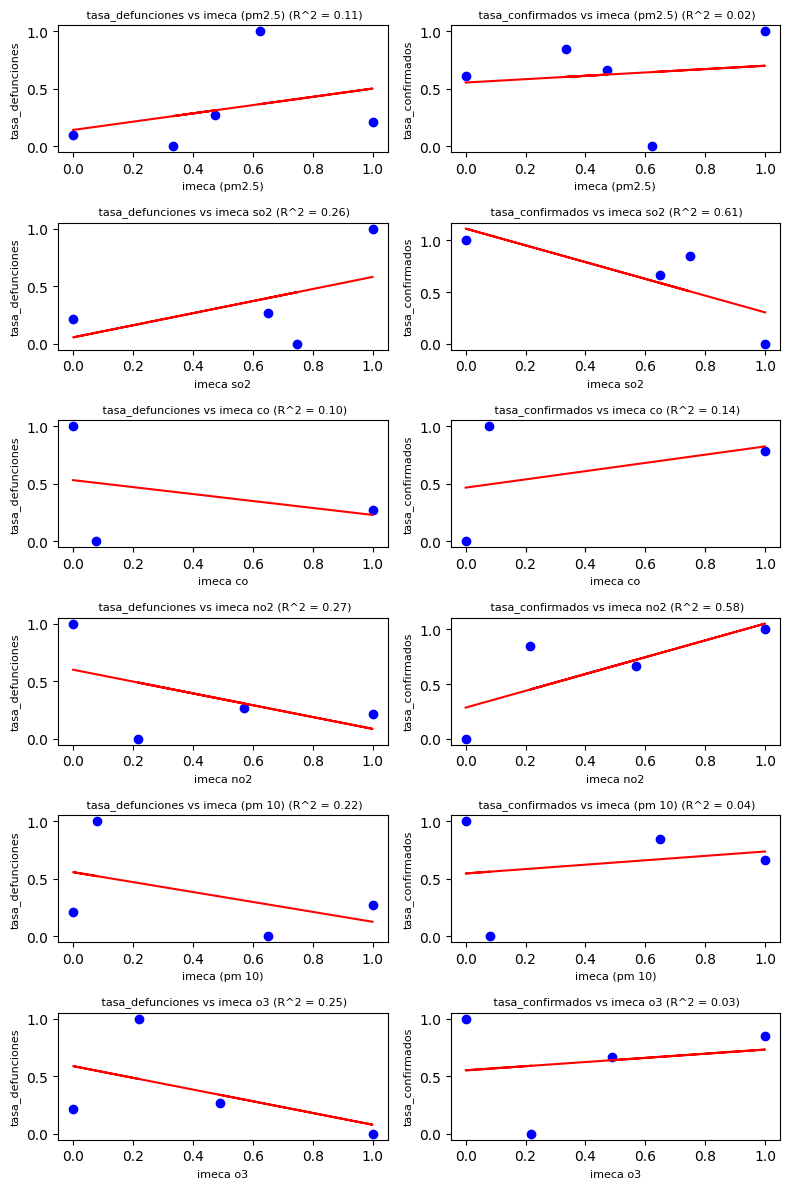

In [97]:
# Filtrar los dataframes para que solo contengan municipios de IDH ALTO
df_pm25_A = df_pm25[df_pm25['municipio'].isin(municipios_interes)]
df_so2_A = df_so2[df_so2['municipio'].isin(municipios_interes)]
df_co_A = df_co[df_co['municipio'].isin(municipios_interes)]
df_no2_A = df_no2[df_no2['municipio'].isin(municipios_interes)]
df_pm10_A = df_pm10[df_pm10['municipio'].isin(municipios_interes)]
df_o3_A = df_o3[df_o3['municipio'].isin(municipios_interes)]

dataframes = [df_pm25_A, df_so2_A, df_co_A, df_no2_A, df_pm10_A, df_o3_A]
columnas = {
    0: 'imeca (pm2.5)',
    1: 'imeca so2',
    2: 'imeca co',
    3: 'imeca no2',
    4: 'imeca (pm 10)',
    5: 'imeca o3'
}

scaler = MinMaxScaler()

def crear_modelo(dataframe, columna, target, ax):
    X = dataframe[[columna]].values
    y = dataframe[[target]].values


    X = scaler.fit_transform(X)
    y = scaler.fit_transform(y)

    modelo = LinearRegression()
    modelo.fit(X, y)
    y_pred = modelo.predict(X)

    r2 = r2_score(y, y_pred)

    ax.scatter(X, y, color='blue')
    ax.plot(X, y_pred, color='red')
    ax.set_xlabel(columna, fontsize=8)
    ax.set_ylabel(target, fontsize=8)
    ax.set_title(f' {target} vs {columna} (R^2 = {r2:.2f})', fontsize=8)

    return modelo, r2

fig, axs = plt.subplots(len(dataframes), 2, figsize=(8, 12))

for i, df in enumerate(dataframes):
    columna = columnas[i]
    for j, target in enumerate(['tasa_defunciones', 'tasa_confirmados']):
        modelo, r2 = crear_modelo(df, columna, target, axs[i, j])
        print(f' {df.columns[1]}, Columna: {columna}, Target: {target}, R^2: {r2:.2f}\\n')

plt.tight_layout()
plt.show()


A pesar de enfocarnos exclusivamente en los municipios con un Índice de Desarrollo Humano (IDH) alto
# IDH MEDIO
A continuación, se realizará el mismo análisis de regresión univariable, pero esta vez se centrará exclusivamente en los municipios con un Índice de Desarrollo Humano (IDH) medio.

 tasa_defunciones, Columna: imeca (pm2.5), Target: tasa_defunciones, R^2: 0.96\n
 tasa_defunciones, Columna: imeca (pm2.5), Target: tasa_confirmados, R^2: 0.93\n


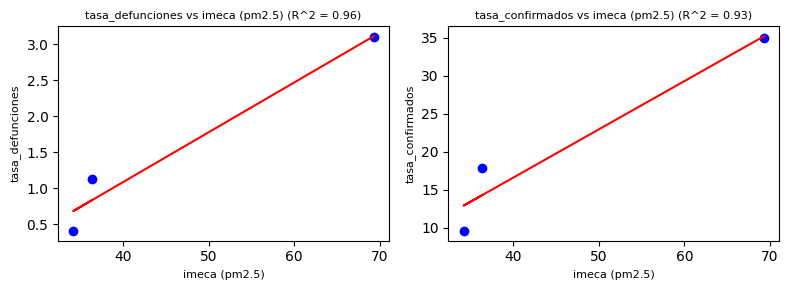

In [98]:
# Filtrar los dataframes para que solo contengan municipios que no sean de IDH ALTO
df_pm25_M = df_pm25[~df_pm25['municipio'].isin(municipios_interes)]
df_so2_M = df_so2[~df_so2['municipio'].isin(municipios_interes)]
df_co_M = df_co[~df_co['municipio'].isin(municipios_interes)]
df_no2_M = df_no2[~df_no2['municipio'].isin(municipios_interes)]
df_pm10_M = df_pm10[~df_pm10['municipio'].isin(municipios_interes)]
df_o3_M = df_o3[~df_o3['municipio'].isin(municipios_interes)]

import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Seleccionar el DataFrame df_pm_M
df_pm_M = df_pm25_M[['imeca (pm2.5)', 'tasa_defunciones', 'tasa_confirmados']]
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Seleccionar el DataFrame df_pm_M
df_pm_M = df_pm25_M[['imeca (pm2.5)', 'tasa_defunciones', 'tasa_confirmados']]

def crear_modelo_univariable(dataframe, columna_x, columna_y, ax):
    X = dataframe[[columna_x]].values
    y = dataframe[columna_y].values

    modelo = LinearRegression()
    modelo.fit(X, y)
    y_pred = modelo.predict(X)

    r2 = r2_score(y, y_pred)

    ax.scatter(X, y, color='blue')
    ax.plot(X, y_pred, color='red')
    ax.set_xlabel(columna_x, fontsize=8)
    ax.set_ylabel(columna_y, fontsize=8)
    ax.set_title(f'{columna_y} vs {columna_x} (R^2 = {r2:.2f})', fontsize=8)

    return modelo, r2

fig, axs = plt.subplots(1, 2, figsize=(8, 3))

modelo_defunciones, r2_defunciones = crear_modelo_univariable(df_pm_M, 'imeca (pm2.5)', 'tasa_defunciones', axs[0])
print(f' {df_pm_M.columns[1]}, Columna: imeca (pm2.5), Target: tasa_defunciones, R^2: {r2_defunciones:.2f}\\n')

modelo_confirmados, r2_confirmados = crear_modelo_univariable(df_pm_M, 'imeca (pm2.5)', 'tasa_confirmados', axs[1])
print(f' {df_pm_M.columns[1]}, Columna: imeca (pm2.5), Target: tasa_confirmados, R^2: {r2_confirmados:.2f}\\n')

plt.tight_layout()
plt.show()


No se dispone de datos para realizar el mismo análisis de regresión univariable en los municipios con un Índice de Desarrollo Humano (IDH) medio para los diferentes compuestos. Únicamente se contaba con información sobre las partículas PM 2.5 en tres municipios.

### En conclusión, tras analizar la correlación entre el promedio de tasa de defunciones y confirmados por cada 10,000 habitantes y los índices proporcionados, no se encontró ninguna correlación significativa. Los valores de R cuadrada de los modelos univariables no fueron favorables en general.

### El valor más alto de R cuadrada fue del 90% para las partículas PM 2.5 en municipios con IDH medio. Sin embargo, este valor solo se basó en tres datos, lo que limita la validez de la conclusión.
### El segundo valor más alto de R cuadrada fue de apenas el 70% para la tasa de confirmados contra SO2, lo que indica una correlación débil.
